In [39]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('../datasets/ml-latest-small/ratings.csv')
title = pd.read_csv('../datasets/ml-latest-small/movies.csv')

In [10]:
df = df.merge(title, on="movieId")

In [102]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())

In [103]:
ratings["count"] = pd.DataFrame(df.groupby("title")["rating"].count())["rating"]

In [104]:
ratings.head()

,rating,count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Text(0,0.5,'Distribution %')

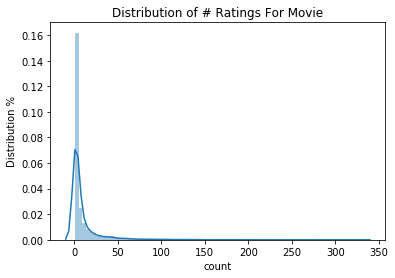

In [105]:
countDist = sns.distplot(ratings["count"], bins=80)
countDist.set_title("Distribution of # Ratings For Movie")
countDist.set_ylabel("Distribution %")

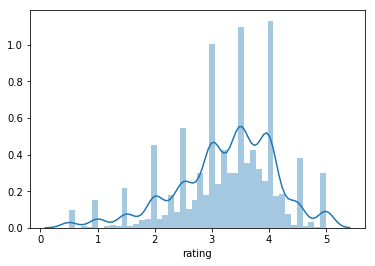

In [106]:
ratingDist = sns.distplot(ratings["rating"])

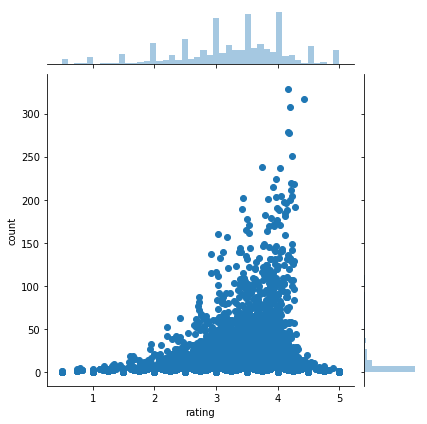

In [107]:
sns.jointplot(x="rating", y="count", data=ratings)

In [109]:
moviemat = df.pivot_table(index="userId", columns="title", values="rating")

In [49]:
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
ratings.sort_values(by="count", ascending=False).head(10)

,title,rating,count
3158,Forrest Gump (1994),4.164134,329
7593,"Shawshank Redemption, The (1994)",4.429022,317
6865,Pulp Fiction (1994),4.197068,307
7680,"Silence of the Lambs, The (1991)",4.161290,279
5512,"Matrix, The (1999)",4.192446,278
8001,Star Wars: Episode IV - A New Hope (1977),4.231076,251
4662,Jurassic Park (1993),3.750000,238
1337,Braveheart (1995),4.031646,237
8363,Terminator 2: Judgment Day (1991),3.970982,224
7421,Schindler's List (1993),4.225000,220


In [57]:
forrestGump = moviemat["Forrest Gump (1994)"]
pulpFiction = moviemat["Pulp Fiction (1994)"]

In [60]:
forrestGump.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [115]:
similar_to_forrest_gump = moviemat.corrwith(forrestGump)
similar_to_forrest_gump.head()

/mnt/c/XPS/python_env/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/mnt/c/XPS/python_env/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [110]:
corr_forrest_gump = pd.DataFrame(similar_to_forrest_gump, columns=["Correlations"])
corr_forrest_gump.dropna(inplace=True)

In [112]:
corr_forrest_gump = corr_forrest_gump.join(ratings)

In [116]:
corr_forrest_gump[corr_forrest_gump["count"] > 100].sort_values("Correlations", ascending=False).head()

,Correlations,rating,count
title,,,
Forrest Gump (1994),1.000000,4.164134,329
Good Will Hunting (1997),0.484042,4.078014,141
Aladdin (1992),0.464268,3.792350,183
American History X (1998),0.457287,4.217054,129
"Truman Show, The (1998)",0.432556,3.812000,125


In [119]:
similar_to_pulp_fiction = moviemat.corrwith(pulpFiction)
similar_to_pulp_fiction.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [120]:
corr_pulp_fiction = pd.DataFrame(similar_to_pulp_fiction, columns=["Correlations"])
corr_pulp_fiction.dropna(inplace=True)

In [121]:
corr_pulp_fiction = corr_pulp_fiction.join(ratings)

In [122]:
corr_pulp_fiction[corr_pulp_fiction["count"] > 100].sort_values("Correlations", ascending=False).head()

,Correlations,rating,count
title,,,
Pulp Fiction (1994),1.000000,4.197068,307
Fight Club (1999),0.543465,4.272936,218
Kill Bill: Vol. 1 (2003),0.504147,3.961832,131
Trainspotting (1996),0.437714,4.039216,102
Kill Bill: Vol. 2 (2004),0.421685,3.868182,110


In [124]:
starWars = moviemat["Star Wars: Episode IV - A New Hope (1977)"]
starWars.head()

userId
1    5.0
2    NaN
3    NaN
4    5.0
5    NaN
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

In [126]:
similar_with_star_wars = moviemat.corrwith(starWars)
similar_with_star_wars.head()

/mnt/c/XPS/python_env/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/mnt/c/XPS/python_env/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [128]:
similar_with_star_wars = pd.DataFrame(similar_with_star_wars, columns=["Correlation"])
similar_with_star_wars.dropna(inplace=True)

In [129]:
similar_with_star_wars = similar_with_star_wars.join(ratings)

In [131]:
similar_with_star_wars[similar_with_star_wars["count"] > 100].sort_values(ascending=False, by="Correlation")

,Correlation,rating,count
title,,,
Star Wars: Episode IV - A New Hope (1977),1.000000,4.231076,251
Star Wars: Episode V - The Empire Strikes Back (1980),0.777970,4.215640,211
Star Wars: Episode VI - Return of the Jedi (1983),0.734230,4.137755,196
"Fugitive, The (1993)",0.482078,3.992105,190
Indiana Jones and the Last Crusade (1989),0.410916,4.046429,140
"Lord of the Rings: The Return of the King, The (2003)",0.406602,4.118919,185
Ghostbusters (a.k.a. Ghost Busters) (1984),0.391613,3.775000,120
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),0.384779,4.207500,200
"Godfather, The (1972)",0.365920,4.289062,192
